In [4]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)

1.15.0


In [0]:
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [7]:
from google.colab import files
files.upload()

Saving creditcard.csv to creditcard (2).csv


In [11]:
dataset = pd.read_csv("creditcard (2).csv")

dataset['Amount'] = np.log(dataset['Amount'] + 1)
dataset['Time'] = np.log(dataset['Time'] + 1)

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['Amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['Time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))



normal = dataset[dataset['Class'] == 0]
anomaly = dataset[dataset['Class'] == 1]
print(normal.shape)
print(anomaly.shape)


(284315, 31)
(492, 31)


In [13]:
from sklearn.model_selection import train_test_split
train_samples_normal = 500/normal.shape[0]

normal_train, normal_remain, _, _ = train_test_split(normal, normal, test_size=1-train_samples_normal, random_state=42)
anormal_train, anormal_remain, _, _ = train_test_split(anomaly, anomaly, test_size=0.3, random_state=42)

normal_valid, normal_test, _, _ = train_test_split(normal_remain, normal_remain, test_size=.5, random_state=42)
anormal_valid, anormal_test, _, _ = train_test_split(anormal_remain, anormal_remain, test_size=.5, random_state=42)


train = normal_train.append(anormal_train).reset_index(drop=True)
valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)


print('Train shape: ', train.shape)
print('Proportion of anomaly in training set: %.2f\n' % train['Class'].mean())
print('Valid shape: ', valid.shape)
print('Proportion of anomaly in validation set: %.2f\n' % valid['Class'].mean())
print('Test shape:, ', test.shape)
print('Proportion of anomaly in test set: %.2f\n' % test['Class'].mean())




Train shape:  (844, 31)
Proportion of anomaly in training set: 0.41

Valid shape:  (141981, 31)
Proportion of anomaly in validation set: 0.00

Test shape:,  (141982, 31)
Proportion of anomaly in test set: 0.00



In [0]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = train.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [0]:
corr = pd.DataFrame(train.corr()['Class'])
corr_pos = corr[corr['Class']>=0]
corr_neg = corr[corr['Class']<0]
corr_neg.sort_values("Class", axis = 0, ascending = True, inplace = True, na_position ='last')
corr_pos.sort_values("Class", axis = 0, ascending = False, inplace = True, na_position ='last')

print(corr_neg[0:3])
print(corr_pos[1:4])



In [44]:
type(corr_neg.index[0])

str

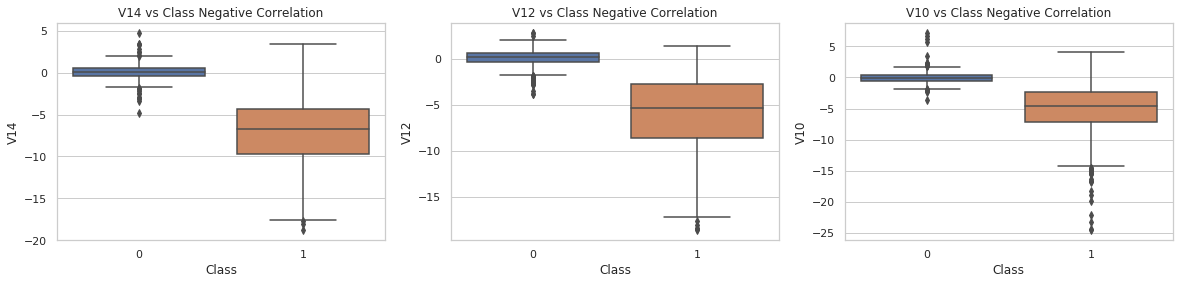

In [47]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y=str(corr_neg.index[0]), data=train, ax=axes[0])
axes[0].set_title(str(corr_neg.index[0]) + ' vs Class Negative Correlation')

sns.boxplot(x="Class", y=str(corr_neg.index[1]), data=train,  ax=axes[1])
axes[1].set_title(str(corr_neg.index[1]) + ' vs Class Negative Correlation')

sns.boxplot(x="Class", y=str(corr_neg.index[2]), data=train,  ax=axes[2])
axes[2].set_title(str(corr_neg.index[2]) + ' vs Class Negative Correlation')

plt.show()



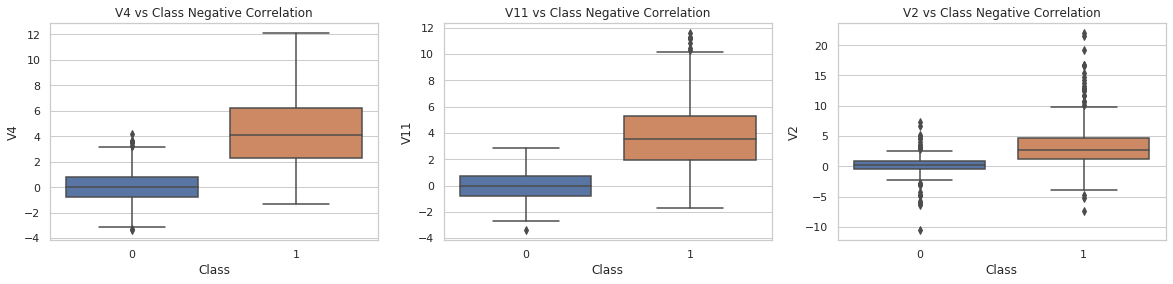

In [48]:


f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive Correlations with our Class (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y=str(corr_pos.index[1]), data=train, ax=axes[0])
axes[0].set_title(str(corr_pos.index[1]) + ' vs Class Negative Correlation')

sns.boxplot(x="Class", y=str(corr_pos.index[2]), data=train,  ax=axes[1])
axes[1].set_title(str(corr_pos.index[2]) + ' vs Class Negative Correlation')

sns.boxplot(x="Class", y=str(corr_pos.index[3]), data=train,  ax=axes[2])
axes[2].set_title(str(corr_pos.index[3]) + ' vs Class Negative Correlation')

plt.show()



In [0]:
# We can think of removing outliers for class 0 or 1 or both from train data, everytime we pick a new train data

In [0]:
# Undersampling before cross validating (prone to overfit)
X = train.drop('Class', axis=1)
y = train['Class']

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [0]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score
#training_score = cross_val_score(classifier, X, y, cv=5)

from sklearn import metrics
#scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')


for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=5, scoring='f1_macro')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [0]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, scoring='f1')
grid_log_reg.fit(X, y)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_



In [0]:
log_reg_score = cross_val_score(log_reg, valid.drop('Class',axis=1), valid['Class'], cv=5, scoring='f1_macro')
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

In [0]:
#Let's now play by changing the amount of normal points in total training data

In [0]:
from sklearn.model_selection import train_test_split
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, scoring='f1')

val_score =[]


for i in [1,2,3,4,5,10,20,50,100,200,300,400]:

  train_samples_normal = (i*500)/normal.shape[0]

  normal_train, normal_remain, _, _ = train_test_split(normal, normal, test_size=1-train_samples_normal, random_state=42)
  anormal_train, anormal_remain, _, _ = train_test_split(anomaly, anomaly, test_size=0.3, random_state=42)

  normal_valid, normal_test, _, _ = train_test_split(normal_remain, normal_remain, test_size=.5, random_state=42)
  anormal_valid, anormal_test, _, _ = train_test_split(anormal_remain, anormal_remain, test_size=.5, random_state=42)

  train = normal_train.append(anormal_train).reset_index(drop=True)
  valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
  test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)

  print('Train shape: ', train.shape)
  print('Proportion of anomaly in training set: %.2f\n' % train['Class'].mean())
  print('Valid shape: ', valid.shape)
  print('Proportion of anomaly in validation set: %.2f\n' % valid['Class'].mean())
  print('Test shape:, ', test.shape)
  print('Proportion of anomaly in test set: %.2f\n' % test['Class'].mean())

  X = train.drop('Class', axis=1)
  y = train['Class']
  grid_log_reg.fit(X, y)
  # We automatically get the logistic regression with the best parameters.
  log_reg = grid_log_reg.best_estimator_

  log_reg_score = cross_val_score(log_reg, valid.drop('Class',axis=1), valid['Class'], cv=5, scoring='f1_macro')
  print('Logistic Regression Cross Validation Score for: ', str(train_samples_normal) , ' fraction of normal data' , str(round(log_reg_score.mean() * 100, 2)) + '%')  

  val_score.append(round(log_reg_score.mean() * 100, 2))




In [98]:
print(val_score)

[72.07, 73.86, 75.27, 73.46, 74.56, 72.04, 72.89, 72.76, 76.15, 78.37, 81.58, 85.22]


In [99]:

size_array = np.array([1,2,3,4,5,10,20,50,100,200,300,400])*500/normal.shape[0]
size_list = list(size_array)

score_by_train_size = pd.DataFrame({'train_fraction_normal' : size_list,
                                'val_score' : val_score}, 
                                columns=['train_fraction_normal','val_score'])
print(score_by_train_size)

    train_fraction_normal  val_score
0                0.001759      72.07
1                0.003517      73.86
2                0.005276      75.27
3                0.007034      73.46
4                0.008793      74.56
5                0.017586      72.04
6                0.035172      72.89
7                0.087931      72.76
8                0.175861      76.15
9                0.351723      78.37
10               0.527584      81.58
11               0.703445      85.22


In [100]:
#Final classification report on untouched test data
pred_y = log_reg.predict(test.drop('Class', axis=1))

print ("")
print ("Classification Report: ")
print (classification_report(test['Class'], pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(test['Class'], pred_y))



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42158
           1       0.85      0.62      0.72        74

    accuracy                           1.00     42232
   macro avg       0.93      0.81      0.86     42232
weighted avg       1.00      1.00      1.00     42232


Accuracy Score:  0.9991475658268612
